# SI 618 - Homework #1: Data Manipulation

Version 2022.01.17.01.CT

## Background

This homework assignment focuses on the analysis of biometric data and exercise performance.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  


A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses  (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view) for detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## Download the data from: 
https://www.kaggle.com/kukuroo3/body-performance-data


In [1]:
MY_UNIQNAME = 'yjwoo' # please fill in your uniqname

## Answer the following questions.
Points for each question are shown below.

For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).  When we ask for an explanation of your answer, we are interested in your interpretation of the analyses that you produce.  With the exception of Question 1a, we are not interested in a description of the steps you took to arrive at your answer.

### <span style="color:magenta"> Q1: 5 pt(total):</span>
#### Q1a (2pt): Write out the steps you need to follow in order to describe the dataset, in terms of size, number of rows, and number of columns.



1. Import necessary libraries
1. Read csv files and save it to a pandas dataframe
1. Use shape attribute of pandas to describe the dataset, in terms of size, number of rows, and number of columns

#### Q1b (3pt): Write and execute the code that will do the steps you identified in Part (a) of this question.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
df_bodyPerformance = pd.read_csv("bodyPerformance.csv")

In [4]:
df_bodyPerformance.shape

(13393, 12)

Our dataset has 13393 rows and 12 columns. 

### <span style="color:magenta">Q2: 5 pt:</span>
Without using pd.DataFrame.describe(), report the median age, height, and weight for people in the data. Round your answer to the nearest whole number.  Be sure to indicate units for each variable in your write-up.

In [5]:
print("Median of age:", round(df_bodyPerformance['age'].median()))
print("Median of height:", round(df_bodyPerformance['height_cm'].median()), "cm")
print("Median of weight:", round(df_bodyPerformance['weight_kg'].median()), "kg")

Median of age: 32
Median of height: 169 cm
Median of weight: 67 kg


- The median age for people in the data is 32.
- The median age for people in the data is 169cm.
- The median age for people in the data is 67kg.

### <span style="color:magenta">Q3: 5 pt: </span>
Look for any anomalous data points.  For example, are there cases where diastolic blood pressure is higher than systolic blood pressure (which is physiologically impossible)?  Do you notice any other anomalies?

In [6]:
df_bodyPerformance.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


### diastolic and systolic

In [7]:
df_bodyPerformance[df_bodyPerformance["diastolic"] > df_bodyPerformance["systolic"]]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
7495,30.0,F,156.2,52.80,28.2,156.2,104.0,21.7,27.2,43.0,162.0,C
7597,30.0,M,166.6,66.08,14.4,67.0,14.0,53.8,17.2,57.0,221.0,A
8217,31.0,M,176.7,80.32,20.8,46.2,43.9,43.9,17.2,57.0,221.0,B
12949,24.0,M,171.0,78.70,20.0,99.0,95.0,46.5,12.8,50.0,197.0,D


When our heart beats, it squeezes and pushes blood through our arteries to the rest of our body. This force creates pressure on those blood vessels, and that's our systolic blood pressure. Also, the diastolic is the pressure in the arteries when the heart rests between beats. Usually systolic is higher than diastolic and it is very rare case that diastolic is higher than systolic. Most of the participants had higher systolic than diastolic, and only 4 had higher diastolic.

In [8]:
df_bodyPerformance[df_bodyPerformance["diastolic"] < 40]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
336,35.0,M,173.1,77.60,22.8,8.0,122.0,46.4,16.7,47.0,216.0,B
344,22.0,F,158.5,49.30,27.0,37.0,77.0,27.1,21.0,59.0,178.0,B
3524,44.0,M,177.0,78.28,22.1,6.0,145.0,47.4,10.5,42.0,215.0,B
6786,22.0,F,164.1,60.80,32.4,30.0,122.0,29.7,-4.6,31.0,159.0,D
10624,26.0,F,160.0,63.56,32.0,0.0,0.0,23.7,17.1,23.0,128.0,D


In [9]:
df_bodyPerformance[df_bodyPerformance["systolic"] < 80]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
344,22.0,F,158.5,49.30,27.0,37.0,77.0,27.1,21.0,59.0,178.0,B
7597,30.0,M,166.6,66.08,14.4,67.0,14.0,53.8,17.2,57.0,221.0,A
8217,31.0,M,176.7,80.32,20.8,46.2,43.9,43.9,17.2,57.0,221.0,B
10624,26.0,F,160.0,63.56,32.0,0.0,0.0,23.7,17.1,23.0,128.0,D


Also there are only 5 people who have lower diastolic blood pressure than 40, and 4 people who have lower systolic blood pressure than 80.

### gripForce

In [10]:
df_bodyPerformance[df_bodyPerformance.gripForce == 0]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
8562,22.0,F,160.4,52.3,34.2,79.0,111.0,0.0,15.2,45.0,165.0,D
9486,45.0,M,172.4,56.7,9.3,72.0,127.0,0.0,9.4,43.0,213.0,B
9768,27.0,M,172.4,83.0,20.2,99.0,153.0,0.0,17.2,56.0,261.0,C


There are only 3 people who have 0 gripforce.

### sit and bend forward_cm and height_cm

In [11]:
df_bodyPerformance[df_bodyPerformance["sit and bend forward_cm"] > df_bodyPerformance["height_cm"] / 4]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
2657,33.0,M,165.6,60.4,17.8,81.0,127.0,38.6,213.0,53.0,244.0,B
3355,45.0,M,164.4,64.4,24.3,96.0,142.0,38.5,185.0,44.0,223.0,A
4203,46.0,M,164.4,63.6,23.4,70.0,115.0,36.0,42.0,42.0,210.0,A


There are only 3 people who have sit and bend forward record(cm) bigger than a quarter of their height.

### broad jump_cm

In [13]:
df_bodyPerformance[df_bodyPerformance["broad jump_cm"] == 0]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
484,22.0,F,167.4,66.2,34.0,62.0,110.0,28.5,11.2,38.0,0.0,C
712,58.0,M,168.7,76.1,27.5,84.0,139.0,34.5,2.0,0.0,0.0,D
1919,59.0,F,162.9,61.0,32.6,82.0,123.0,29.7,19.5,0.0,0.0,D
4756,28.0,M,176.6,82.2,20.7,83.0,126.0,40.9,17.6,46.0,0.0,C
4900,60.0,F,162.2,67.3,41.8,47.0,131.0,22.1,19.5,0.0,0.0,D
7366,50.0,M,178.2,88.4,23.4,85.0,146.0,54.9,19.3,51.0,0.0,C
7721,56.0,F,156.0,51.1,28.4,73.0,113.0,20.7,23.0,23.0,0.0,C
7944,45.0,F,153.4,33.7,16.1,81.0,124.0,6.7,11.5,8.0,0.0,D
7954,61.0,F,153.0,64.6,31.4,77.0,152.0,14.0,20.6,0.0,0.0,D
8599,60.0,F,160.0,76.9,50.3,82.0,141.0,20.1,-8.1,0.0,0.0,D


There are only 10 people with a broad jump record of 0cm.

### <span style="color:magenta">Q4: 10 pt:</span>
Generate histogram plots for the age, weight, and height for gender F participants. Describe the plots and point out any interesting aspects.

<AxesSubplot:ylabel='Frequency'>

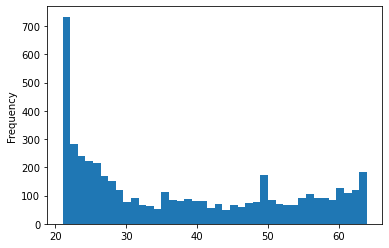

In [14]:
df_bodyPerformance[df_bodyPerformance["gender"] == 'F'].age.plot.hist(bins = 40)

In [15]:
df_bodyPerformance[df_bodyPerformance["gender"] == 'F'].age.describe()

count    4926.000000
mean       37.850995
std        14.417859
min        21.000000
25%        24.000000
50%        34.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Above graph shows the histogram for the age for female participants. Female participants' ages are from the minimum age 21 to the maximum age 64. From total 4926 female participants, 50% of them are below 34 years old and the mean age of the female participants is 37 years. In particular, female participants under the age of 25 accounted for the largest share, accounting for 25% of the female participants. 

<AxesSubplot:ylabel='Frequency'>

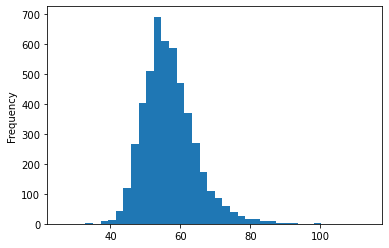

In [16]:
df_bodyPerformance[df_bodyPerformance["gender"] == 'F'].weight_kg.plot.hist(bins = 40)

In [17]:
df_bodyPerformance[df_bodyPerformance["gender"] == 'F'].weight_kg.describe()

count    4926.000000
mean       56.905899
std         7.639541
min        26.300000
25%        51.965000
50%        55.900000
75%        61.000000
max       113.300000
Name: weight_kg, dtype: float64

Above plot shows the histogram for the weights(kg) for female participants. The weights(kg) of female participants roughly follow a normal distribution. The mean weight(kg) of the female participants is about 56kg. About 50% of female participants are distributed between 52kg and 61kg, which is around the mean weight. The minimum weight of the female participants is about 26kg and the maximum weight is about 113kg.

<AxesSubplot:ylabel='Frequency'>

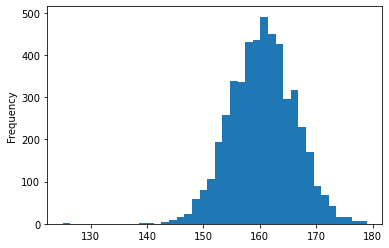

In [18]:
df_bodyPerformance[df_bodyPerformance["gender"] == 'F'].height_cm.plot.hist(bins = 40)

In [19]:
df_bodyPerformance[df_bodyPerformance["gender"] == 'F'].height_cm.describe()

count    4926.000000
mean      160.485404
std         5.648771
min       125.000000
25%       156.600000
50%       160.500000
75%       164.300000
max       179.000000
Name: height_cm, dtype: float64

Above plot shows the histogram for the height(cm) for female participants. The heights(cm) of female participants also roughly follow a normal distribution. The mean height(cm) of the female participants is about 160cm. About 50% of female participants are distributed between 156cm and 164cm, which is around the mean height. The minimum height of the female participants is about 125cm and the maximum height is about 179cm.

### <span style="color:magenta">Q5: 10 pt:</span>
Blood pressure is reported as two numbers: diastolic (the lower number) and systolic (the higher number).  So, for example, if a person has a diastolic measurement of 80 and a systolic measurement of 120, the person's blood pressure would be reported as 120/80.

Blood pressure measurements fall into several categories:

Normal blood pressure. Your blood pressure is normal if it's below 120/80 mm Hg.

Elevated blood pressure. Elevated blood pressure is a systolic pressure ranging from 120 to 129 mm Hg and a diastolic pressure below (not above) 80 mm Hg. Elevated blood pressure tends to get worse over time unless steps are taken to control blood pressure. Elevated blood pressure may also be called prehypertension.

Stage 1 hypertension. Stage 1 hypertension is a systolic pressure ranging from 130 to 139 mm Hg or a diastolic pressure ranging from 80 to 89 mm Hg.

Stage 2 hypertension. More-severe hypertension, stage 2 hypertension is a systolic pressure of 140 mm Hg or higher or a diastolic pressure of 90 mm Hg or higher.

Hypertensive crisis. A blood pressure measurement higher than 180/120 mm Hg is an emergency situation that requires urgent medical care. If you get this result when you take your blood pressure at home, wait five minutes and retest. If your blood pressure is still this high, contact your doctor immediately. If you also have chest pain, vision problems, numbness or weakness, breathing difficulty, or any other signs and symptoms of a stroke or heart attack, call 911 or your local emergency medical number.

Report the number of people in each of those categories.

In [20]:
df_bodyPerformance.loc[(df_bodyPerformance['diastolic'] < 80) & (df_bodyPerformance['systolic'] < 120), "bp_category"] = "normal"

In [22]:
df_bodyPerformance.loc[(df_bodyPerformance['diastolic'] < 80) & (df_bodyPerformance['systolic'] >= 120) & (df_bodyPerformance['systolic'] <= 129), "bp_category"] = "elevated"

In [23]:
df_bodyPerformance.loc[(df_bodyPerformance['diastolic'] >= 80) & (df_bodyPerformance['diastolic'] <= 89) | (df_bodyPerformance['systolic'] >= 130) & (df_bodyPerformance['systolic'] <= 139), "bp_category"] = "hyper_1"

In [24]:
df_bodyPerformance.loc[(df_bodyPerformance['diastolic'] >= 90) | (df_bodyPerformance['systolic'] >= 140), "bp_category"] = "hyper_2"

In [25]:
df_bodyPerformance.loc[(df_bodyPerformance['diastolic'] >= 120) | (df_bodyPerformance['systolic'] >= 180), "bp_category"] = "hypertensive"

In [26]:
df_bodyPerformance["bp_category"].value_counts()

hyper_2         4402
hyper_1         3987
normal          2898
elevated        2090
hypertensive      16
Name: bp_category, dtype: int64

- There are 2898 people in normal blood pressure category.
- There are 2090 people in elevated blood pressure category.
- There are 3987 people in stage 1 hypertension category.
- There are 4402 people in stage 2 hypertension category.
- There are 16 people in hypertensive crisis category.

### <span style="color:magenta">Q6: 10 pt:</span>
Create a new variable "age_class" that is "early" if age < 40, "middle" if age is between 40 and 60 (inclusive) and "late" if age > 60.  Report the mean number of sit-ups counts for each of those categories.


In [27]:
df_bodyPerformance.loc[df_bodyPerformance["age"] < 40, "age_class"] = "early"
df_bodyPerformance.loc[(df_bodyPerformance["age"] >= 40) & (df_bodyPerformance["age"] <= 60), "age_class"] = "middle"
df_bodyPerformance.loc[df_bodyPerformance["age"] > 60, "age_class"] = "late"

In [28]:
df_bodyPerformance["age_class"].value_counts()

early     8453
middle    3976
late       964
Name: age_class, dtype: int64

In [29]:
df_bodyPerformance.groupby("age_class")["sit-ups counts"].mean()

age_class
early     45.305217
late      24.060166
middle    31.815141
Name: sit-ups counts, dtype: float64

- Among all participants, 8453 people in early class, 3976 people in middle class, and 964 people in late class.
- The mean number of sit-ups counts for early age class is about 45 counts.
- The mean number of sit-ups counts for middle age class is about 32 counts.
- The mean number of sit-ups counts for late age class is about 24 counts.

### <span style="color:magenta">Q7: 10 pt: </span>
Calculate each person's Body Mass Index (BMI).  With the metric system, the formula for BMI is weight in kilograms divided by height in meters squared. Since height is commonly measured in centimeters, an alternate calculation formula, dividing the weight in kilograms by the height in centimeters squared, and then multiplying the result by 10,000, can be used. (https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_1.html)

Create two histograms of BMI: one for gender F and one for gender M.  Describe similarites and differences of the two histograms.

In [30]:
df_bodyPerformance["BMI"] = (df_bodyPerformance["weight_kg"] / np.square(df_bodyPerformance["height_cm"])) * 10000

<AxesSubplot:xlabel='BMI', ylabel='Count'>

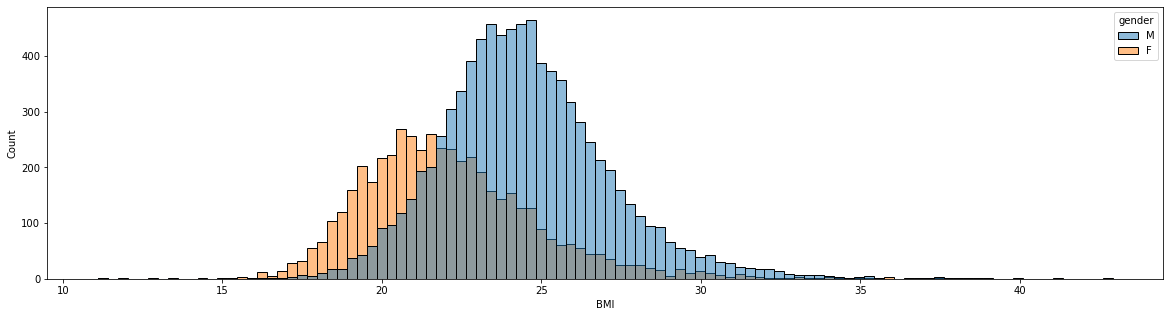

In [31]:
figure(figsize = (20, 5))
sns.histplot(x = "BMI", data = df_bodyPerformance, hue = "gender")

In [32]:
df_bodyPerformance[df_bodyPerformance["gender"] == "F"].BMI.describe()

count    4926.000000
mean       22.104225
std         2.835768
min        11.103976
25%        20.185997
50%        21.740786
75%        23.600966
max        42.906509
Name: BMI, dtype: float64

In [33]:
df_bodyPerformance[df_bodyPerformance["gender"] == "M"].BMI.describe()

count    8467.000000
mean       24.479737
std         2.632064
min        11.314973
25%        22.784071
50%        24.286919
75%        25.937514
max        39.949756
Name: BMI, dtype: float64

Above histogram shows two histograms of BMI for female and male participants. The two histograms are similar in that they are roughly normally distributed. Male BMIs are normally distributed centered on an average BMI of 24, and female BMIs are normally distributed centered on an average BMI of 22. The male BMI distribution is a little more bell shaped, and the female BMI distribution is slightly right-skewed. This is because the number of male participants is 8,467, which is twice as many as the number of female participants, 4926. Both male and female BMIs ranges are similar. Male BMI ranges from a minimum BMI of 11 to a maximum BMI of 40, and female BMI ranges from a minimum BMI of 11 to a maximum BMI of 43.

### <span style="color:magenta">Q8: 10 pt: </span>
Compare the mean values of height, weight, body fat %, grip force, sit and bend forward, and sit-ups count for gender F vs. gender M.  You should use both quantitative and visual methods in your work.


In [34]:
df_bodyPerformance.groupby("gender")[["height_cm", "weight_kg", "body fat_%", "gripForce", 
                                      "sit and bend forward_cm", "sit-ups counts"]].mean()

,height_cm,weight_kg,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts
gender,,,,,,
F,160.485404,56.905899,28.486085,25.817994,18.839791,30.888348
M,173.257399,73.580187,20.188151,43.448420,13.097073,44.939176


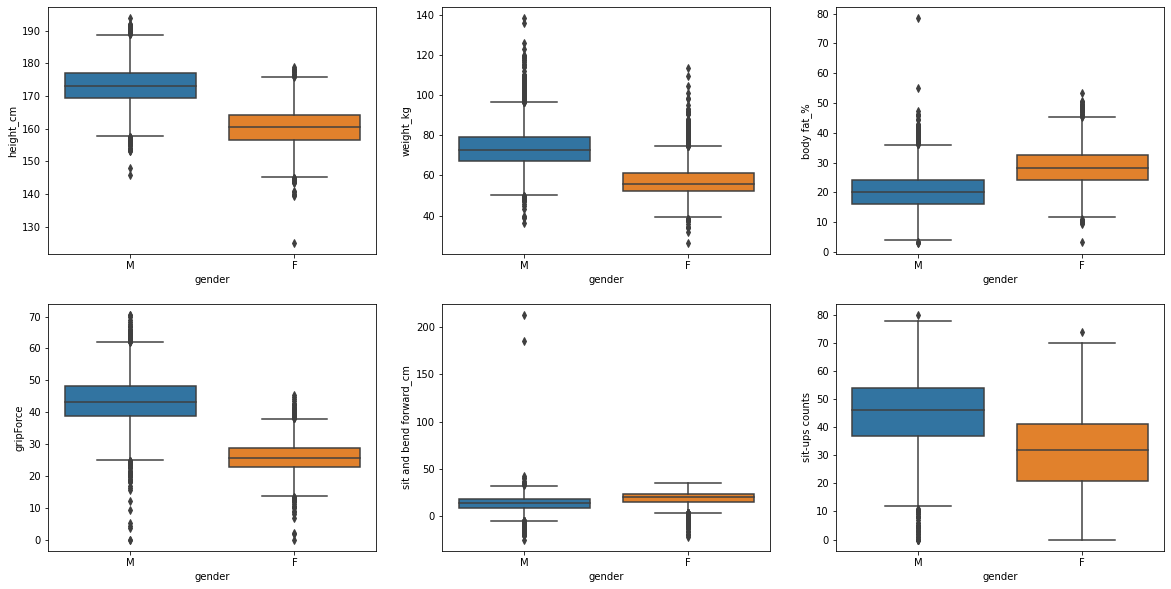

In [35]:
column_list = ["height_cm", "weight_kg", "body fat_%", "gripForce", "sit and bend forward_cm", "sit-ups counts"]

fig, axes = plt.subplots(2, 3, figsize = (20,10))

for i, column in enumerate(column_list):
    sns.boxplot(ax = axes[i//3 ,i%3], x = "gender", y = column, data = df_bodyPerformance)

Of the six columns, most have a higher average for male participants. Male participants have higher mean of height(cm), weight(kg), gripforce, and sit-up counts than female participants. On the other hand, in the case of body fat(%) and sit and bend forward(cm), female participants have higher mean than male participants. The average difference between male and female participants in gripforce and weight was the largest, about 18 and 17kg, respectively. On the other hand, in sit and bend forward, the average difference between male and female participants was the smallest, about 6cm.

### <span style="color:magenta">Q9: 15 pt: </span>
Take a look at gripForce (a measure of strength), "sit and bend forward" (a measure of flexibility), and "sit-ups count" (a measures of strength and endurance of the abdominals and hip-flexor muscles).  For each of those measures, calculate their z-scores (i.e. subtract the mean of the variable from each observation, then divide by the standard deviation of that score).  Create an overall fitness score by adding the z-scores for each of those variables together, then use `pd.qcut()` (not `pd.cut()`) to assign them to five categories ranging from lowest score to highest score.  Report the number of individuals in each of the resulting categories.

In [36]:
column_list = ["gripForce", "sit and bend forward_cm", "sit-ups counts"]

for c in column_list:
    df_bodyPerformance[c + "_z"] = (df_bodyPerformance[c] - df_bodyPerformance[c].mean()) / np.std(df_bodyPerformance[c]) 

In [37]:
df_bodyPerformance["fitness_z_score"] = df_bodyPerformance["gripForce_z"] + df_bodyPerformance["sit and bend forward_cm_z"] + df_bodyPerformance["sit-ups counts_z"]

In [38]:
df_bodyPerformance.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,bp_category,age_class,BMI,gripForce_z,sit and bend forward_cm_z,sit-ups counts_z,fitness_z_score
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,hyper_1,early,25.344179,1.688190,0.377317,1.416961,3.482469
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,elevated,early,20.495868,-0.053073,0.128984,0.926634,1.002544
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,hyper_2,early,24.181428,0.737554,-0.379509,0.646446,1.004491
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,hyper_2,early,23.349562,0.417538,-0.001096,0.926634,1.343076
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,elevated,early,22.412439,0.615195,1.406129,0.366259,2.387583


In [39]:
df_bodyPerformance["fitness_z_score_category"] = pd.qcut(df_bodyPerformance["fitness_z_score"], 5, labels = ["1", "2", "3", "4", "5"])

In [40]:
df_bodyPerformance["fitness_z_score"].describe()

count    1.339300e+04
mean    -9.210565e-15
std      2.069496e+00
min     -8.549441e+00
25%     -1.342875e+00
50%      1.283733e-01
75%      1.446425e+00
max      2.447021e+01
Name: fitness_z_score, dtype: float64

In [41]:
df_bodyPerformance.groupby("fitness_z_score_category").describe().fitness_z_score

,count,mean,std,min,25%,50%,75%,max
fitness_z_score_category,,,,,,,,
1,2679.0,-3.024088,1.083468,-8.549441,-3.611890,-2.716795,-2.185150,-1.737997
2,2678.0,-1.018661,0.383879,-1.737555,-1.342800,-0.992169,-0.686688,-0.388680
3,2679.0,0.130260,0.293402,-0.388338,-0.121732,0.128373,0.381064,0.641575
4,2678.0,1.172948,0.321520,0.641834,0.896726,1.157383,1.446399,1.772966
5,2679.0,2.739598,0.905236,1.773129,2.136721,2.582575,3.164675,24.470209


New column fitness_z_score ranges between minimum -8.5 and maximum 24. We assign them to five categories(1 ~ 5) ranging from lowest score to highest score. 
- category 1: category 1 ranges from about -8.5 to about -1.73
- category 2: category 2 ranges from about -1.73 to about -0.38
- category 3: category 3 ranges from about -0.38 to about 0.64
- category 4: category 4 ranges from about 0.64 to about 1.77
- category 5: category 5 ranges from about 1.77 to about 24

Since qcut splits all participants into 5 groups of the same size, the number of people in each group is approximately 2679 equally.

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas